# Fetching Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Loading dataset:

In [2]:
df = pd.read_csv('C:/csv_files/avocado.csv')
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Observation: We load the dataset. Here, Daily journal is giving.

In [3]:
df.shape

(18249, 14)

Observation: There is 18249 rows and 14 columns in dataset.

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Observation: We see the columns name. 

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Observation: Here we see the data types of different columns.Here columns are in integet, float and object. Object data type should be droped or use label encoder and change them in further.

# Using Encoding Function

In [6]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

Observation: Here, we can see two types of object data in type column.

In [7]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

Observation: Here, we use Label Encoder to convert object type column into integer.

In [9]:
le = LabelEncoder()

Observation: Here, we are taking instance of Label Encoder.

In [10]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1, 1))
        
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,150,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,111,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,72,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,33,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,160,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,151,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,112,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,73,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Observation: Here, we use for loop to convert object type data into integer.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int32  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int32  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int32  
dtypes: float64(9), int32(3), int64(2)
memory usage: 1.7 MB


Observation: Apart from data type here, we also see null values. Here, all columns have same no. of rows.

# Finding Missing Values:

In [12]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observation: Here, we see there is no any null value present inside the data.

<AxesSubplot:>

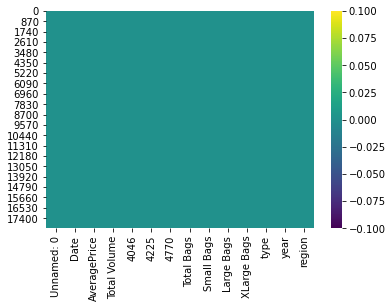

In [13]:
sns.heatmap(df.isnull(), cmap = 'viridis')

Observation: Here, we show null values through heatmap visualization graph.

# Summary Statistics

In [14]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.999233,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,15.481045,48.787516,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


Observation: 
Describe method shows us the total count value, mean, standard deviation, minimum value, maximum value, median, 25% and 75% of data of each columns.
Standard deviation shows spread of data.
50% is showing the median of data.
The gap between maximum and 75% is shows us skewness of column. If it is high then that column has skewness else no skewnes is present.

In [15]:
df.AveragePrice.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

In [16]:
df1 = df.drop(['Unnamed: 0', 'Date'], axis = 1)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Observation: Here, we drop two unnecessary columns.

# Finding Correlation

In [17]:
df_cor = df1.corr()
df_cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


Observation: Here we see correlations between each and every column. Here 1 shows highly correlated value, negative figure shows less correlated and between 1 to 0 shows positive correlated values.

<AxesSubplot:>

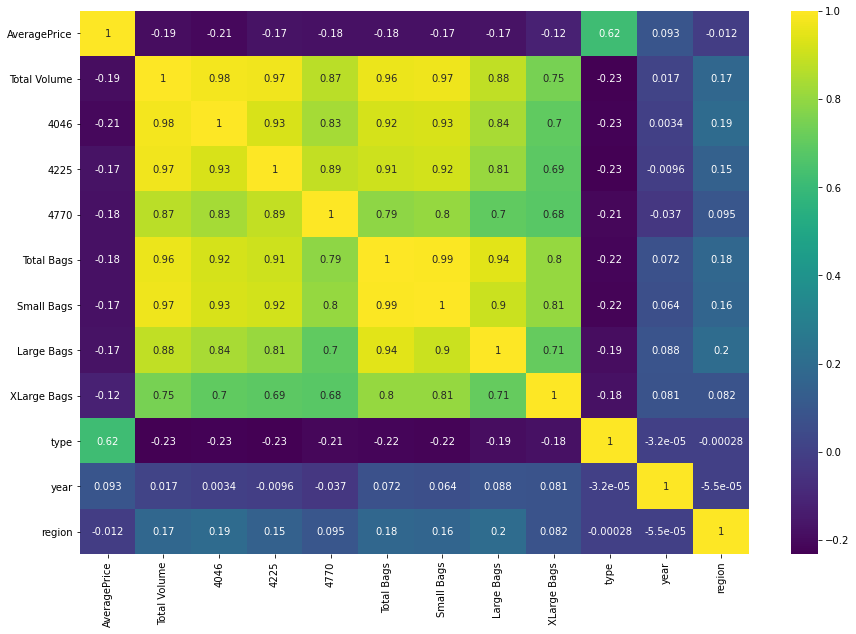

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_cor, cmap = 'viridis', annot = True)

Observation: Here,we see in the above correlation the lighter colour shows positive correlation and darker colour shows negative correlations between each columns. 

# Data Visualization

In [19]:
df1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

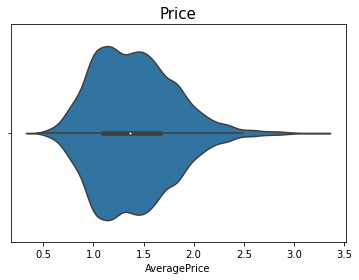

In [20]:
sns.violinplot(df1['AveragePrice'])
plt.title('Price', fontsize = 15)

plt.show()

Observation: Here, we see the average price of avacado is spread between 0.5 to 2.5

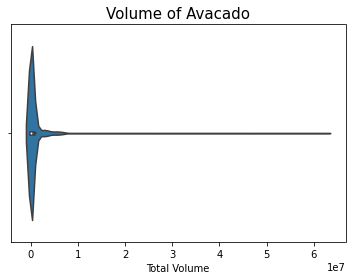

In [21]:
sns.violinplot(df1['Total Volume'])
plt.title('Volume of Avacado', fontsize = 15)

plt.show()

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

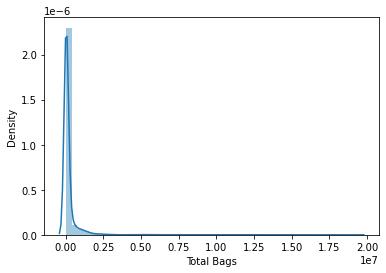

In [22]:
sns.distplot(df1['Total Bags'], bins = 50)

<AxesSubplot:xlabel='4770', ylabel='Density'>

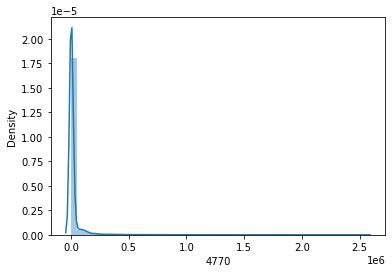

In [23]:
sns.distplot(df1['4770'], bins = 50)

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

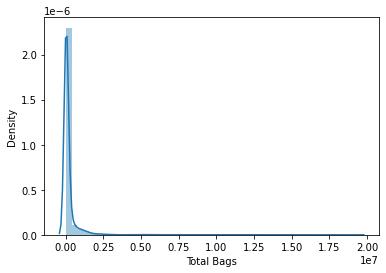

In [24]:
sns.distplot(df1['Total Bags'], bins = 50, kde = True)

<AxesSubplot:xlabel='4046', ylabel='Density'>

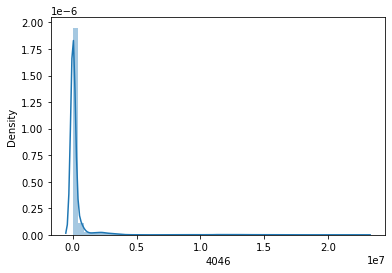

In [25]:
sns.distplot(df1['4046'], bins = 50, kde = True)

# Finding Skewness

In [26]:
df1.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Observation: Here, we see most of them are highly skewed.

# Handling Skewness

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1)
memory usage: 1.5 MB


# Cube Root Transformation

In [28]:
df_cbrt = np.cbrt(df1['Total Volume'])

In [29]:
df_cbrt.head()

0    40.049235
1    38.001150
2    49.079175
3    42.906983
4    37.093893
Name: Total Volume, dtype: float64

In [30]:
df_cbrt.skew()

2.236143405070054

In [31]:
df_cbrt = np.cbrt(df1['4046'])
print(df_cbrt.skew())
df_cbrt = np.cbrt(df1['4225'])
print(df_cbrt.skew())
df_cbrt = np.cbrt(df1['4770'])
print(df_cbrt.skew())
df_cbrt = np.cbrt(df1['Total Bags'])
print(df_cbrt.skew())
df_cbrt = np.cbrt(df1['Small Bags'])
print(df_cbrt.skew())
df_cbrt = np.cbrt(df1['Large Bags'])
print(df_cbrt.skew())
df_cbrt = np.cbrt(df1['XLarge Bags'])
print(df_cbrt.skew())

2.277861439840141
2.1303775962072042
2.316048218214482
2.302176335205292
2.2176815955777704
2.1865135087582934
2.8422553762768645


Observation: Here, we use cube root in the above code to remove the skewnes.

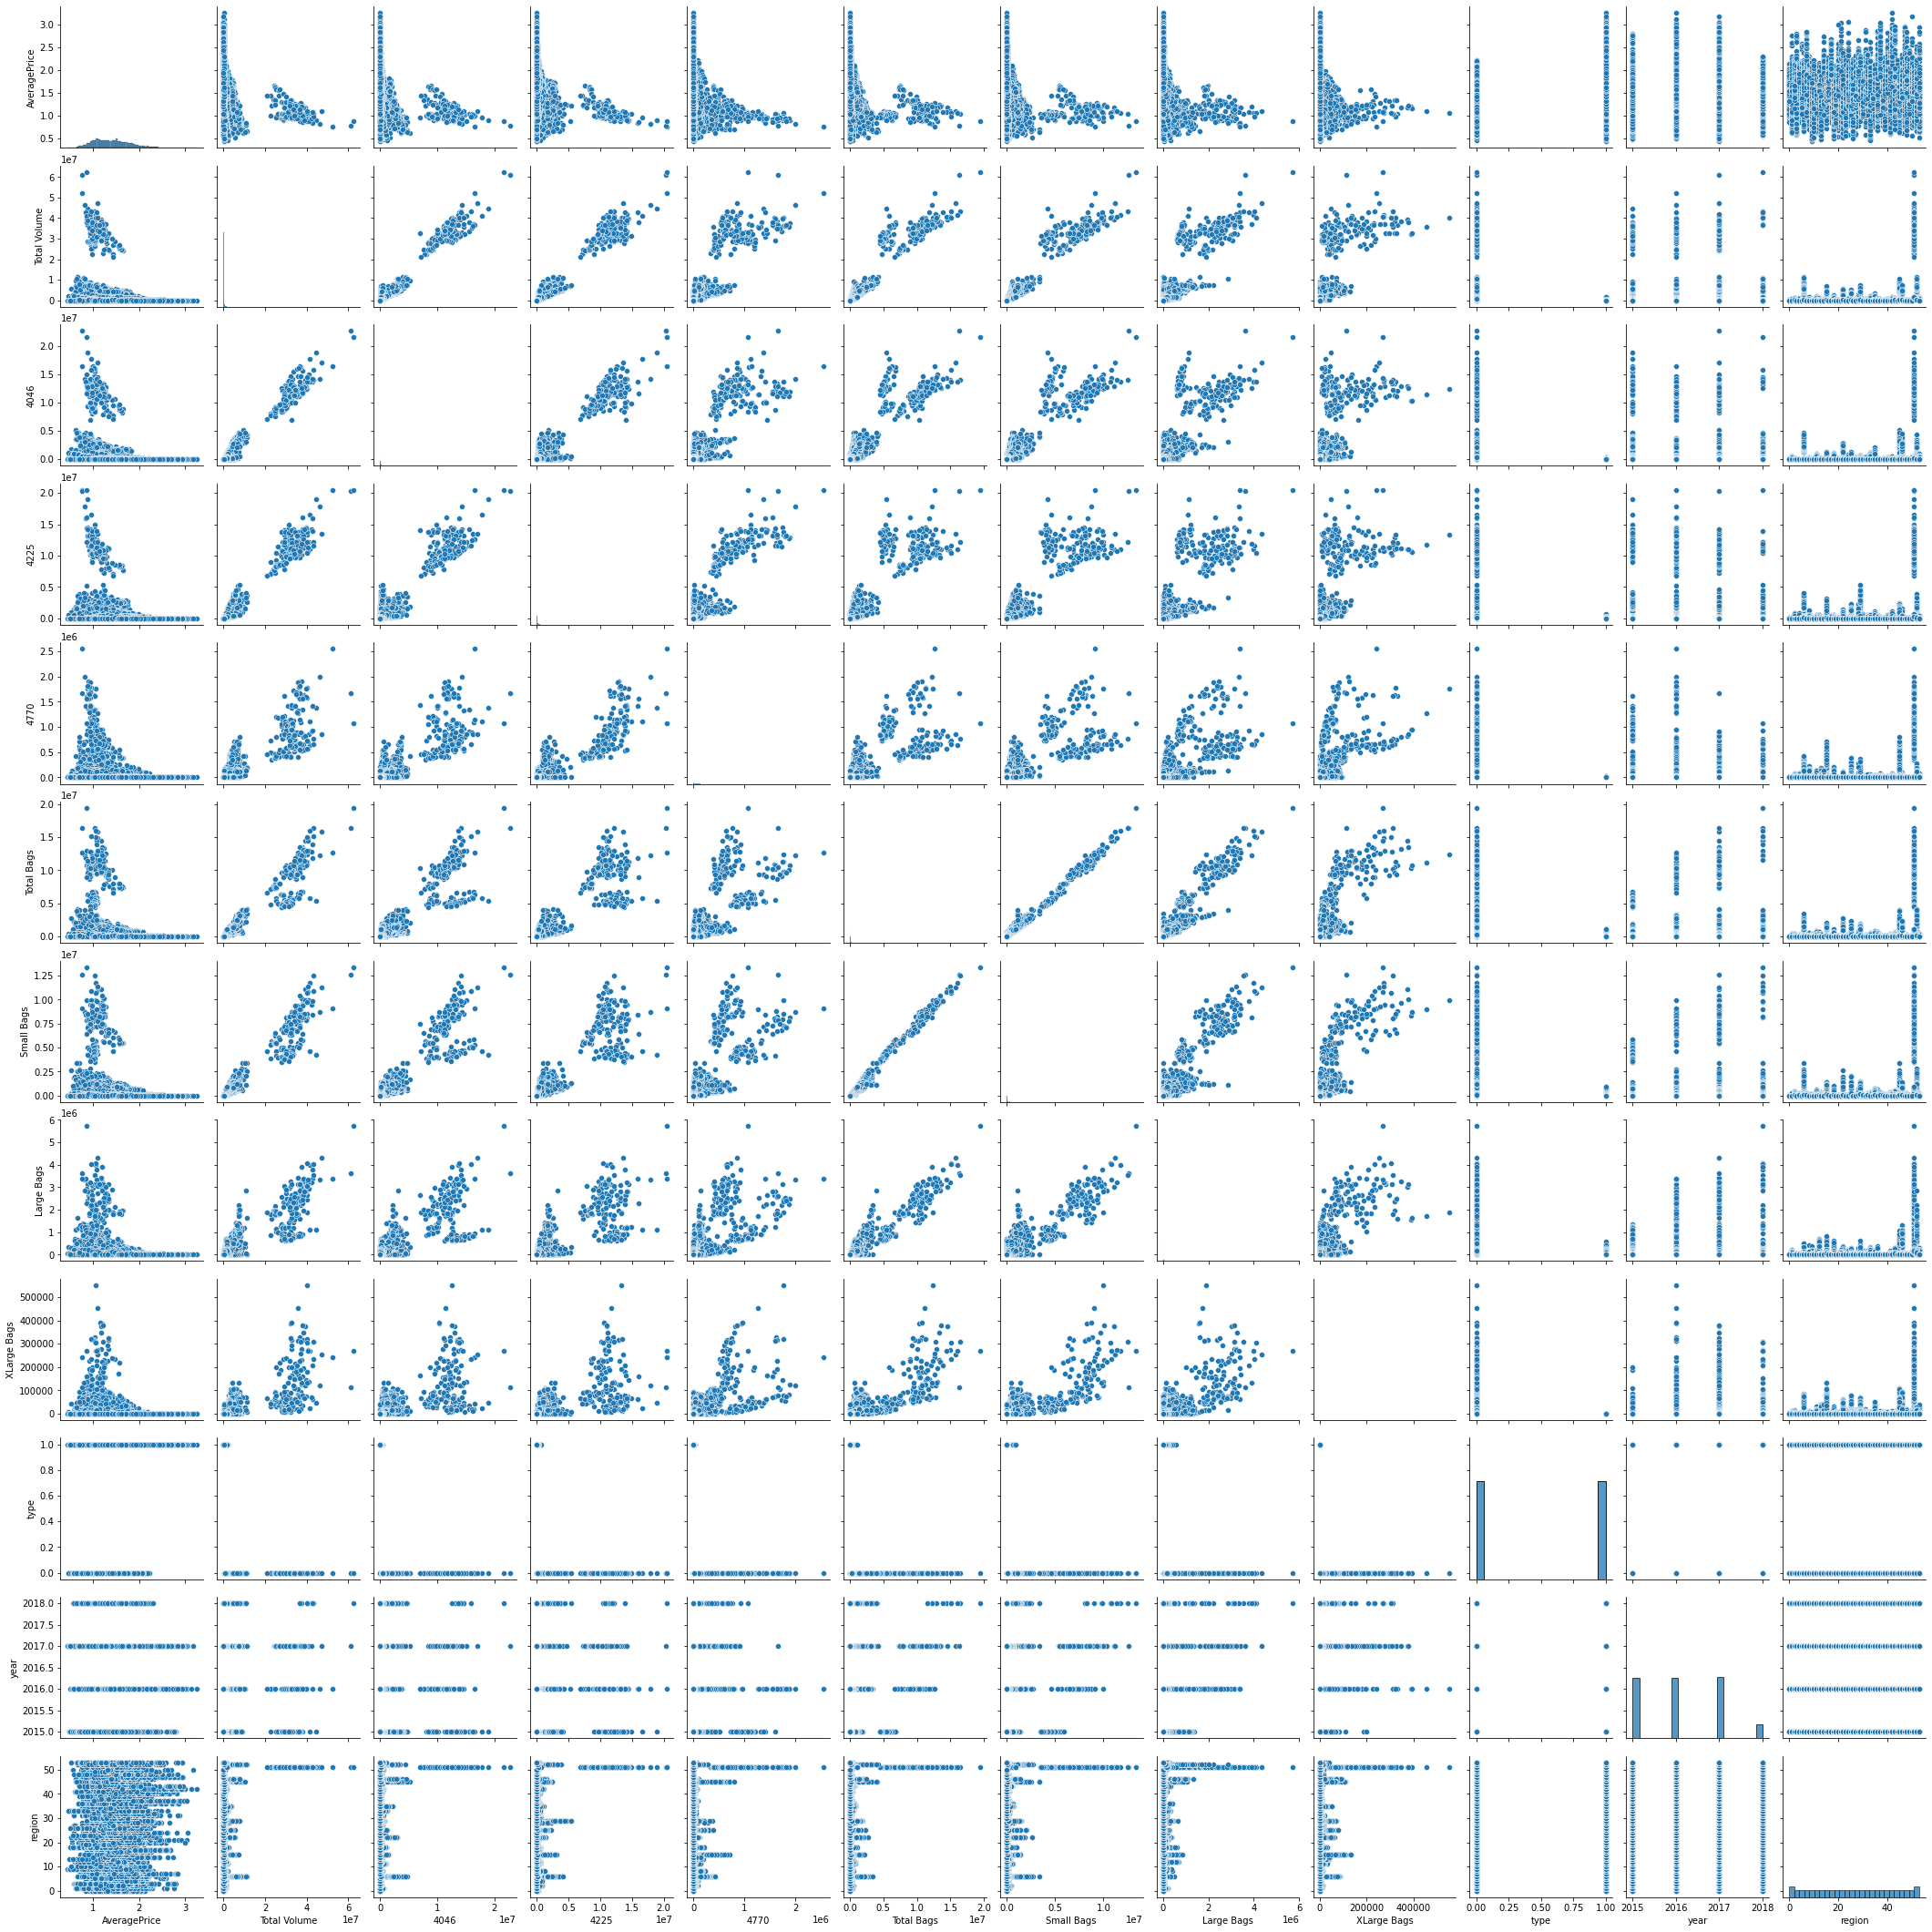

In [32]:
sns.pairplot(df1)

Observation: Here, we see some skewness present in data but most of them are positive correlated.

# Find Outliers

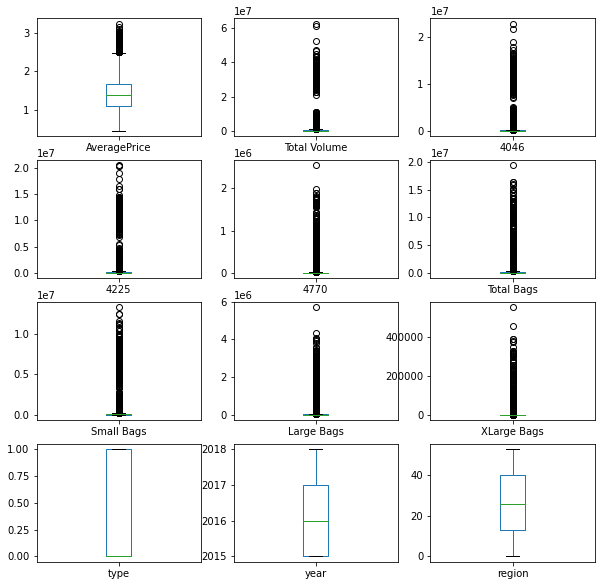

In [34]:
df1.plot(kind = 'box', subplots = True, layout = (4,3), figsize = (10,10))
plt.show()

Observation: Here, we can see outliers in side the data. We have to remove them for better results.

# Removing Outliers

In [35]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df1))
threshold = 3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

Observation: Here, we are calculating zscore to find outliers.

In [36]:
df_new_z = df1[(z<3).all(axis = 1)]
df_new_z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


Observation: Here, we removed outliers from the data.

In [37]:
df_new_z.shape

(17651, 12)

# Finding % loss of data after removing outliers:

In [38]:
Data_loss = ((18249 - 17651)/18249)*100
Data_loss

3.276891884486821

# Separating data into features and target:

In [39]:
x = df_new_z.iloc[:,:-1]
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015


In [40]:
x.shape

(17651, 11)

In [41]:
y = df_new_z.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

Observation: Here, we can see the target data is split from all.

In [42]:
y.shape

(17651,)

# Traning the data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.22, random_state = 43)

Observation: Here, we use 80% of data for training and rest of 20% for testing.

# Model selection

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

In [45]:
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
mnb = MultinomialNB()

In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.787847579814624
[[53  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  1  2 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        82
           1       0.66      0.63      0.65        71
           2       0.88      0.91      0.90        70
           3       0.75      0.73      0.74        63
           4       0.80      0.82      0.81        72
           5       0.66      0.76      0.71        76
           6       0.93      0.98      0.95        54
           7       0.78      0.78      0.78        80
           8       0.87      0.93      0.90        73
           9       0.85      0.72      0.78        81
          10       0.74      0.71      0.72        65
          11       0.84      0.91      0.87        80
          12       0.83      0.87      0.85        78
          13       0.62      0.71      0.66        69
          14   

In [47]:
model = [dtc,knn,svc,mnb]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    print('Accuracy score of', m, 'is :')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print('\n')

Accuracy score of DecisionTreeClassifier() is :
0.791967044284243
[[54  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  2  2 ...  0  0 50]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        82
           1       0.65      0.65      0.65        71
           2       0.88      0.91      0.90        70
           3       0.71      0.71      0.71        63
           4       0.79      0.79      0.79        72
           5       0.63      0.79      0.70        76
           6       0.93      0.98      0.95        54
           7       0.83      0.79      0.81        80
           8       0.90      0.89      0.90        73
           9       0.86      0.73      0.79        81
          10       0.74      0.69      0.71        65
          11       0.85      0.90      0.87        80
          12       0.84      0.87      0.86        78
          13       0.

Accuracy score of MultinomialNB() is :
0.24588053553038106
[[25  0  0 ...  0  0  0]
 [ 2  8  0 ...  0  0  0]
 [ 2  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  5  0]
 [ 0  0  0 ...  3 11  0]
 [ 1  0  0 ...  0  0  9]]
              precision    recall  f1-score   support

           0       0.14      0.30      0.19        82
           1       0.33      0.11      0.17        71
           2       0.76      0.37      0.50        70
           3       0.10      0.27      0.14        63
           4       0.50      0.25      0.33        72
           5       0.10      0.46      0.16        76
           6       0.20      0.20      0.20        54
           7       0.63      0.28      0.38        80
           8       0.90      0.52      0.66        73
           9       0.25      0.42      0.32        81
          10       0.32      0.09      0.14        65
          11       0.14      0.11      0.13        80
          12       0.45      0.49      0.47        78
          13       0.68     

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train, y_train)

LinearRegression()

In [50]:
lr.coef_

array([ 1.42350273,  0.00278098, -0.00277555, -0.00278261, -0.00286253,
        1.69770402, -1.70047804, -1.70046456, -1.70071098,  0.57357549,
       -0.52153745])

In [51]:
lr.intercept_

1074.6076197543264

In [52]:
lr.score(x_train, y_train)

0.05970146362133355

Observation: Here, we can see that lr score is very poor.This model is not working good.

# saving the best model

In [53]:
import joblib
joblib.dump(dtc, 'dtcfile.obj')
dtc_from_joblib = joblib.load('dtcfile.obj')

dtc_from_joblib.predict(x_test)

array([40, 12, 12, ..., 30, 35,  5])